In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=yf.download(tickers='^GSPC',period='10y',interval='1d')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-07,1413.949951,1420.339966,1410.900024,1418.069946,1418.069946,3125160000
2012-12-10,1418.069946,1421.640015,1415.640015,1418.550049,1418.550049,2999430000
2012-12-11,1418.550049,1434.270020,1418.550049,1427.839966,1427.839966,3650230000
2012-12-12,1427.839966,1438.589966,1426.760010,1428.479980,1428.479980,3709050000
2012-12-13,1428.479980,1431.359985,1416.000000,1419.449951,1419.449951,3349960000
...,...,...,...,...,...,...
2022-12-01,4087.139893,4100.509766,4050.870117,4076.570068,4076.570068,4527130000
2022-12-02,4040.169922,4080.479980,4026.629883,4071.699951,4071.699951,4012620000
2022-12-05,4052.020020,4052.449951,3984.489990,3998.840088,3998.840088,4280820000


In [3]:
def add_Ichimoku_to_df(ticker,stk_per,stk_int):
    hi_val=df['High'].rolling(window=9).max()
    low_val=df['Low'].rolling(window=9).min()
    df['Conversion']=(hi_val+low_val)/2
    
    hi_val2=df['High'].rolling(window=26).max()
    low_val2=df['Low'].rolling(window=26).min()
    df['Baseline']=(hi_val2+low_val2)/2
    
    df['SpanA']=((df['Conversion']+df['Baseline'])/2).shift(26)
    
    hi_val3=df['High'].rolling(window=52).max()
    low_val3=df['Low'].rolling(window=52).min()
    df['SpanB']=((hi_val3+low_val3)/2).shift(26)
    
    df['Lagging']=df['Close'].shift(-26)
    
    return df
    
    

In [4]:
gspc_df=add_Ichimoku_to_df('^GSPC','10y','1d')
gspc_df

,Open,High,Low,Close,Adj Close,Volume,Conversion,Baseline,SpanA,SpanB,Lagging
Date,,,,,,,,,,,
2012-12-07,1413.949951,1420.339966,1410.900024,1418.069946,1418.069946,3125160000,NaN,NaN,NaN,NaN,1472.630005
2012-12-10,1418.069946,1421.640015,1415.640015,1418.550049,1418.550049,2999430000,NaN,NaN,NaN,NaN,1480.939941
2012-12-11,1418.550049,1434.270020,1418.550049,1427.839966,1427.839966,3650230000,NaN,NaN,NaN,NaN,1485.979980
2012-12-12,1427.839966,1438.589966,1426.760010,1428.479980,1428.479980,3709050000,NaN,NaN,NaN,NaN,1492.560059
2012-12-13,1428.479980,1431.359985,1416.000000,1419.449951,1419.449951,3349960000,NaN,NaN,NaN,NaN,1494.810059
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,4087.139893,4100.509766,4050.870117,4076.570068,4076.570068,4527130000,4016.924927,3899.329834,3688.270081,3908.429932,NaN
2022-12-02,4040.169922,4080.479980,4026.629883,4071.699951,4071.699951,4012620000,4016.924927,3899.329834,3716.119995,3908.429932,NaN
2022-12-05,4052.020020,4052.449951,3984.489990,3998.840088,3998.840088,4280820000,4019.079834,3899.329834,3725.632446,3908.429932,NaN


In [5]:
def get_Ichimoku(ticker,Start,End):
    df=yf.download(tickers=ticker,period='10y',interval='1d')
    #Conversion
    hi_val=df['High'].rolling(window=9).max()
    low_val=df['Low'].rolling(window=9).min()
    df['Conversion']=(hi_val+low_val)/2
    #Baseline
    hi_val2=df['High'].rolling(window=26).max()
    low_val2=df['Low'].rolling(window=26).min()
    df['Baseline']=(hi_val2+low_val2)/2
    #Spans
    df['SpanA']=((df['Conversion']+df['Baseline'])/2).shift(26)
    hi_val3=df['High'].rolling(window=52).max()
    low_val3=df['Low'].rolling(window=52).min()
    df['SpanB']=((hi_val3+low_val3)/2).shift(26)
    df['Lagging']=df['Close'].shift(-26)

    #candlestick
    plt.figure(figsize=(15,10))
    df1=df#.sort_index().loc[Start:End]
    width = 1
    width2 = .1

    #define up and down prices
    up = df1[df1.Close>=df1.Open]
    down = df1[df1.Close<df1.Open]

    #define colors to use
    col1 = 'green'
    col2 = 'red'

    #plot up prices
    plt.bar(np.array(up.index),up.Close-up.Open,width,bottom=up.Open,color=col1)
    plt.bar(np.array(up.index),up.High-up.Close,width2,bottom=up.Close,color=col1)
    plt.bar(np.array(up.index),up.Low-up.Open,width2,bottom=up.Open,color=col1)

    #plot down prices
    plt.bar(np.array(down.index),down.Close-down.Open,width,bottom=down.Open,color=col2)
    plt.bar(np.array(down.index),down.High-down.Open,width2,bottom=down.Open,color=col2)
    plt.bar(np.array(down.index),down.Low-down.Close,width2,bottom=down.Close,color=col2)
    
    plt.plot(np.array(df1.index),np.array(df1.Lagging),linewidth=1)
    
    idx=np.array(df1.index)
    SpanA=np.array(df1['SpanA'])
    SpanB=np.array(df1['SpanB'])
    Conversion=np.array(df1['Conversion'])
    Baseline=np.array(df1['Baseline'])

    plt.plot(idx,SpanA,
             color='#04DE71',
            linestyle='--',
             alpha=0.5,
             linewidth=1,
             label='SpanA'
            )
    plt.plot(idx,SpanB,
             color='#00F5EA',
             linestyle='--',
             linewidth=1,
             alpha=0.5,
             label='SpanB'
            )
    
    plt.plot(idx,Conversion,
             color='green',
             linewidth=2,
             label='Conversion'
            )
    plt.plot(idx,Baseline,
             color='red',
             linestyle='-',
             linewidth=2,
             label='Baseline'
            )
    
    plt.fill_between(idx,
                     SpanA,
                     SpanB,
                     where=(SpanA>SpanB),
                     alpha=0.5,
                     color='green'
                    )
    plt.fill_between(idx,
                     SpanA,
                     SpanB,
                     where=(SpanA<SpanB),
                     alpha=0.5,
                     color='red')

    #rotate x-axis tick labels
    plt.xticks(rotation=45, ha='right')

    #display candlestick chart
    plt.legend()
    plt.show()


[*********************100%***********************]  1 of 1 completed


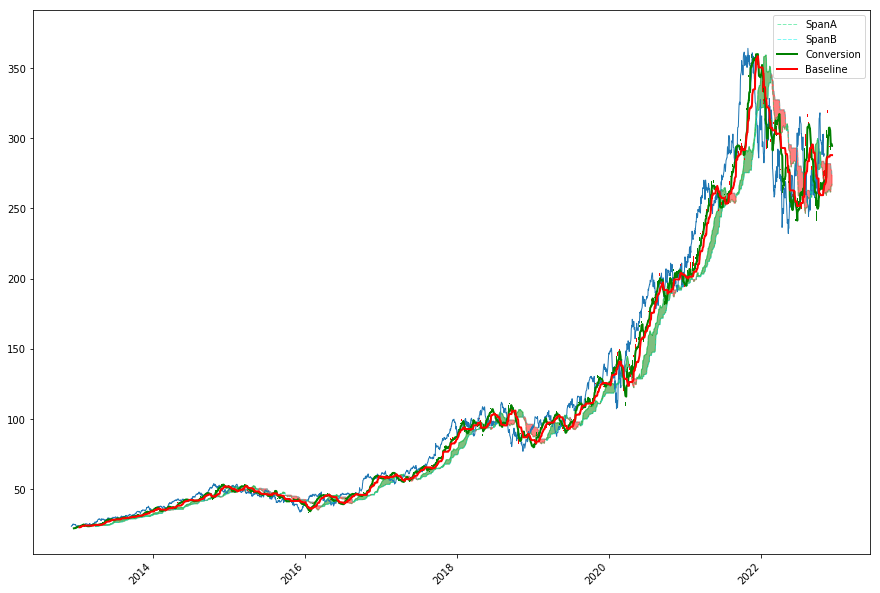

In [6]:
get_Ichimoku('ODFL','2021-11-1','2022-11-19')

In [7]:
def calc_buy_and_sell(df):
    df['over_cloud']=np.where((df['Open']>=df['SpanA'])&(df['Open']>=df['SpanB']),1,-1)
    df['a_over_b']=np.where((df['SpanA']>=df['SpanB']),1,-1)
    df['conv_over_base']=np.where((df['Conversion']>=df['Baseline']),1,-1)
    df['price_over_conv']=np.where((df['Open']>=df['Conversion']),1,-1)
    df.dropna(subset=['SpanA','SpanB','Lagging'],inplace=True)
    df['position']=df['over_cloud']+df['a_over_b']+df['conv_over_base']+df['price_over_conv']
    df['label'] = np.where(df['SpanA'] > df['SpanB'], 1, 0)
    df['group'] = df['label'].ne(df['label'].shift()).cumsum()#ne means not equal to ,it looks back when the label was 1 when 
    #it is 0 and 
    return df

In [8]:
def add_daily_return_to_df(df):
    df['Daily_Return']=(df['Close']/df['Close'].shift(1))-1
    return df

In [9]:
gspc_df=add_daily_return_to_df(calc_buy_and_sell(gspc_df))
gspc_df

,Open,High,Low,Close,Adj Close,Volume,Conversion,Baseline,SpanA,SpanB,Lagging,over_cloud,a_over_b,conv_over_base,price_over_conv,position,label,group,Daily_Return
Date,,,,,,,,,,,,,,,,,,,
2013-04-02,1562.170044,1573.660034,1562.170044,1570.250000,1570.250000,3312160000,1558.605042,1529.335022,1506.692474,1464.524963,1632.689941,1,1,1,1,4,1,1,NaN
2013-04-03,1570.250000,1571.469971,1549.800049,1553.689941,1553.689941,4060610000,1558.605042,1529.335022,1505.589966,1464.524963,1626.670044,1,1,1,1,4,1,1,-0.010546
2013-04-04,1553.689941,1562.599976,1552.520020,1559.979980,1559.979980,3350670000,1559.780029,1534.270020,1505.674988,1464.524963,1633.699951,1,1,1,-1,2,1,1,0.004048
2013-04-05,1559.979980,1559.979980,1539.500000,1553.280029,1553.280029,3515410000,1556.580017,1537.570007,1507.012482,1464.524963,1633.770020,1,1,1,1,4,1,1,-0.004295
2013-04-08,1553.260010,1563.069946,1548.630005,1563.069946,1563.069946,2887120000,1556.580017,1537.570007,1507.974976,1464.524963,1650.339966,1,1,1,-1,2,1,1,0.006303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-25,3799.439941,3862.850098,3799.439941,3859.110107,3859.110107,4843120000,3677.215088,3699.325073,4029.679932,4023.419922,4076.570068,-1,1,-1,1,0,1,61,0.016267
2022-10-26,3825.969971,3886.149902,3824.070068,3830.600098,3830.600098,4817310000,3732.914917,3699.325073,4024.909912,4023.419922,4071.699951,-1,1,1,1,2,1,61,-0.007388
2022-10-27,3834.689941,3859.949951,3803.790039,3807.300049,3807.300049,4687320000,3762.399902,3688.864990,4005.884888,4023.419922,3998.840088,-1,-1,1,1,0,0,62,-0.006083


In [10]:
 df['label'].ne(df['label'].shift()).cumsum()[80:120]

Date
2013-07-25    1
2013-07-26    1
2013-07-29    1
2013-07-30    1
2013-07-31    1
2013-08-01    1
2013-08-02    1
2013-08-05    1
2013-08-06    1
2013-08-07    1
2013-08-08    2
2013-08-09    2
2013-08-12    2
2013-08-13    2
2013-08-14    2
2013-08-15    2
2013-08-16    3
2013-08-19    3
2013-08-20    3
2013-08-21    3
2013-08-22    3
2013-08-23    3
2013-08-26    3
2013-08-27    3
2013-08-28    3
2013-08-29    3
2013-08-30    3
2013-09-03    3
2013-09-04    3
2013-09-05    3
2013-09-06    3
2013-09-09    3
2013-09-10    3
2013-09-11    3
2013-09-12    3
2013-09-13    3
2013-09-16    3
2013-09-17    3
2013-09-18    3
2013-09-19    3
Name: label, dtype: int32

In [11]:
df[['label','group']].sort_index().loc['2013-08-05':'2013-08-19']


,label,group
Date,,
2013-08-05,1,1
2013-08-06,1,1
2013-08-07,1,1
2013-08-08,0,2
2013-08-09,0,2
2013-08-12,0,2
2013-08-13,0,2
2013-08-14,0,2
2013-08-15,0,2


In [12]:
gspc_df['inv_val']=0
prev_inv_val=gspc_df.iloc[0]['Open']
gspc_df

,Open,High,Low,Close,Adj Close,Volume,Conversion,Baseline,SpanA,SpanB,Lagging,over_cloud,a_over_b,conv_over_base,price_over_conv,position,label,group,Daily_Return,inv_val
Date,,,,,,,,,,,,,,,,,,,,
2013-04-02,1562.170044,1573.660034,1562.170044,1570.250000,1570.250000,3312160000,1558.605042,1529.335022,1506.692474,1464.524963,1632.689941,1,1,1,1,4,1,1,NaN,0
2013-04-03,1570.250000,1571.469971,1549.800049,1553.689941,1553.689941,4060610000,1558.605042,1529.335022,1505.589966,1464.524963,1626.670044,1,1,1,1,4,1,1,-0.010546,0
2013-04-04,1553.689941,1562.599976,1552.520020,1559.979980,1559.979980,3350670000,1559.780029,1534.270020,1505.674988,1464.524963,1633.699951,1,1,1,-1,2,1,1,0.004048,0
2013-04-05,1559.979980,1559.979980,1539.500000,1553.280029,1553.280029,3515410000,1556.580017,1537.570007,1507.012482,1464.524963,1633.770020,1,1,1,1,4,1,1,-0.004295,0
2013-04-08,1553.260010,1563.069946,1548.630005,1563.069946,1563.069946,2887120000,1556.580017,1537.570007,1507.974976,1464.524963,1650.339966,1,1,1,-1,2,1,1,0.006303,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-25,3799.439941,3862.850098,3799.439941,3859.110107,3859.110107,4843120000,3677.215088,3699.325073,4029.679932,4023.419922,4076.570068,-1,1,-1,1,0,1,61,0.016267,0
2022-10-26,3825.969971,3886.149902,3824.070068,3830.600098,3830.600098,4817310000,3732.914917,3699.325073,4024.909912,4023.419922,4071.699951,-1,1,1,1,2,1,61,-0.007388,0
2022-10-27,3834.689941,3859.949951,3803.790039,3807.300049,3807.300049,4687320000,3762.399902,3688.864990,4005.884888,4023.419922,3998.840088,-1,-1,1,1,0,0,62,-0.006083,0


In [13]:
for index,row in gspc_df.iterrows():
    if row['group']>2:
        if pd.isnull(row['Daily_Return']):#that protect us from null value inside our raily return column
            row['inv_val']=prev_inv_val
        else:
            row['inv_val']=(prev_inv_val*row['Daily_Return'])+prev_inv_val
    else:
        row['inv_val']=prev_inv_val
        
    gspc_df.loc[index, 'inv_val'] = row['inv_val']
    prev_inv_val=row['inv_val']
        

In [14]:
gspc_df

,Open,High,Low,Close,Adj Close,Volume,Conversion,Baseline,SpanA,SpanB,Lagging,over_cloud,a_over_b,conv_over_base,price_over_conv,position,label,group,Daily_Return,inv_val
Date,,,,,,,,,,,,,,,,,,,,
2013-04-02,1562.170044,1573.660034,1562.170044,1570.250000,1570.250000,3312160000,1558.605042,1529.335022,1506.692474,1464.524963,1632.689941,1,1,1,1,4,1,1,NaN,1562.170044
2013-04-03,1570.250000,1571.469971,1549.800049,1553.689941,1553.689941,4060610000,1558.605042,1529.335022,1505.589966,1464.524963,1626.670044,1,1,1,1,4,1,1,-0.010546,1562.170044
2013-04-04,1553.689941,1562.599976,1552.520020,1559.979980,1559.979980,3350670000,1559.780029,1534.270020,1505.674988,1464.524963,1633.699951,1,1,1,-1,2,1,1,0.004048,1562.170044
2013-04-05,1559.979980,1559.979980,1539.500000,1553.280029,1553.280029,3515410000,1556.580017,1537.570007,1507.012482,1464.524963,1633.770020,1,1,1,1,4,1,1,-0.004295,1562.170044
2013-04-08,1553.260010,1563.069946,1548.630005,1563.069946,1563.069946,2887120000,1556.580017,1537.570007,1507.974976,1464.524963,1650.339966,1,1,1,-1,2,1,1,0.006303,1562.170044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-25,3799.439941,3862.850098,3799.439941,3859.110107,3859.110107,4843120000,3677.215088,3699.325073,4029.679932,4023.419922,4076.570068,-1,1,-1,1,0,1,61,0.016267,3628.793009
2022-10-26,3825.969971,3886.149902,3824.070068,3830.600098,3830.600098,4817310000,3732.914917,3699.325073,4024.909912,4023.419922,4071.699951,-1,1,1,1,2,1,61,-0.007388,3601.984516
2022-10-27,3834.689941,3859.949951,3803.790039,3807.300049,3807.300049,4687320000,3762.399902,3688.864990,4005.884888,4023.419922,3998.840088,-1,-1,1,1,0,0,62,-0.006083,3580.075047


In [15]:
print(prev_inv_val)

3640.8947895649703


In [16]:
df[['Open','label','group','Daily_Return','inv_val']].sort_index().loc['2013-08-05':'2013-08-29']

,Open,label,group,Daily_Return,inv_val
Date,,,,,
2013-08-05,1708.010010,1,1,-0.001480,1562.170044
2013-08-06,1705.790039,1,1,-0.005723,1562.170044
2013-08-07,1695.300049,1,1,-0.003806,1562.170044
2013-08-08,1693.349976,0,2,0.003885,1562.170044
2013-08-09,1696.099976,0,2,-0.003570,1562.170044
2013-08-12,1688.369995,0,2,-0.001153,1562.170044
2013-08-13,1690.650024,0,2,0.002776,1562.170044
2013-08-14,1693.880005,0,2,-0.005177,1562.170044
2013-08-15,1679.609985,0,2,-0.014282,1562.170044


In [17]:
(1562.170044*-0.003305)+1562.170044

1557.0070720045799

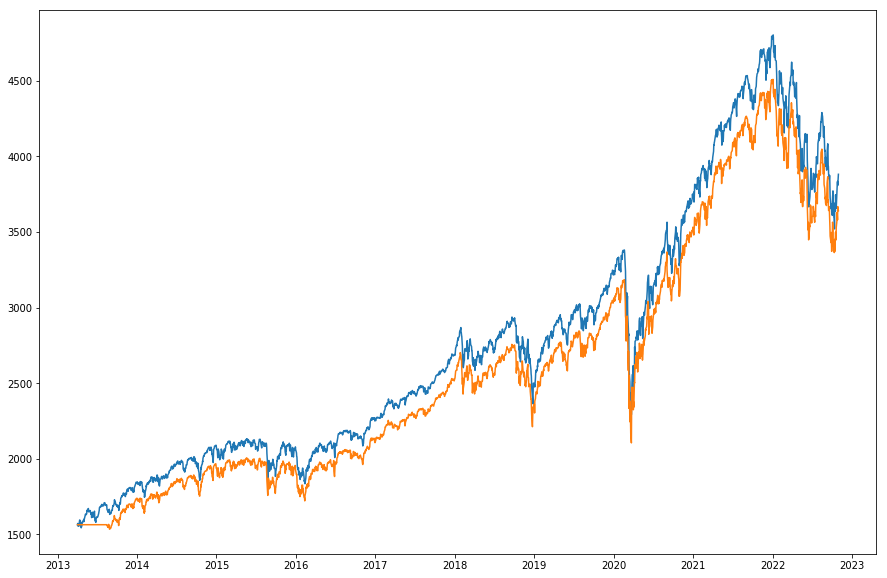

In [18]:
plt.figure(figsize=(15,10))
plt.plot(np.array(gspc_df.index),gspc_df[['Open','inv_val']])

In [19]:
#Test Ichimoku
def test_ichimoku(ticker,period,interval):
    df=add_Ichimoku_to_df(ticker,period,interval)
    get_Ichimoku(ticker,'2021-11-1','2022-11-19')
    df=calc_buy_and_sell(df)
    df=add_daily_return_to_df(df)
    df['inv_val']=0
    prev_inv_val=gspc_df.iloc[0]['Open']
        # Cycle through rows and buy when the cloud is greater than 2
    for index, row in df.iterrows():
        if row['group'] > 2:
            # If daily_return is null keep the previous investment value
            if pd.isnull(row['Daily_Return']):
                row['inv_val'] = prev_inv_val
            else:
                # Hold the stock for the day and keep any profit or loss
                row['inv_val'] = (prev_inv_val * row['Daily_Return']) + prev_inv_val
        else:
            # Don't invest and keep previous investment
            row['inv_val'] = prev_inv_val
        # Store the investment total in the original dataframe
        df.loc[index, 'inv_val'] = row['inv_val']
        # Save the previous day investment so we can use it in calculations
        prev_inv_val = row['inv_val']

    return df

[*********************100%***********************]  1 of 1 completed


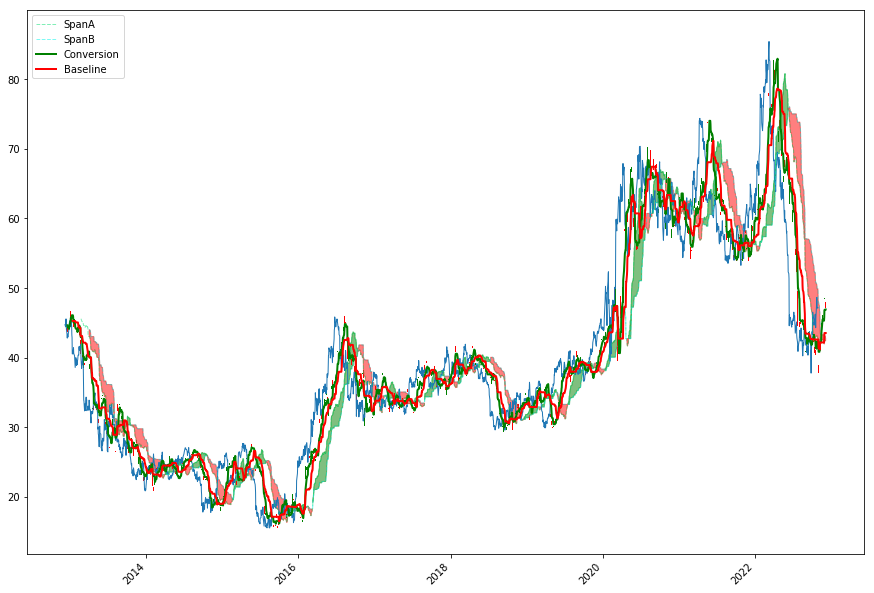

,Open,High,Low,Close,Adj Close,Volume,Conversion,Baseline,SpanA,SpanB,Lagging,over_cloud,a_over_b,conv_over_base,price_over_conv,position,label,group,Daily_Return,inv_val
Date,,,,,,,,,,,,,,,,,,,,
2013-07-22,1694.410034,1697.609985,1690.670044,1695.530029,1695.530029,2779130000,1672.635010,1628.969971,1633.082489,1611.605042,1630.479980,1,1,1,1,4,1,1,NaN,1694.410034
2013-07-23,1696.630005,1698.780029,1691.130005,1692.390015,1692.390015,3096180000,1678.095032,1629.554993,1633.082489,1611.605042,1634.959961,1,1,1,1,4,1,1,-0.001852,1694.410034
2013-07-24,1696.060059,1698.380005,1682.569946,1685.939941,1685.939941,3336120000,1685.309998,1629.554993,1633.082489,1611.605042,1638.170044,1,1,1,1,4,1,1,-0.003811,1694.410034
2013-07-25,1685.209961,1690.939941,1680.069946,1690.250000,1690.250000,3322500000,1685.309998,1629.554993,1634.457489,1611.605042,1632.969971,1,1,1,-1,2,1,1,0.002556,1694.410034
2013-07-26,1687.310059,1691.849976,1676.030029,1691.650024,1691.650024,2762770000,1685.309998,1629.554993,1636.917480,1611.605042,1639.770020,1,1,1,1,4,1,1,0.000828,1694.410034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-19,3849.909912,3900.449951,3838.500000,3899.889893,3899.889893,3766850000,3978.179932,4081.179932,4079.297607,3947.390137,3859.110107,-1,1,-1,-1,-2,1,61,0.006857,3977.567705
2022-09-20,3875.229980,3876.010010,3827.540039,3855.929932,3855.929932,4058050000,3973.409912,4076.409912,4090.577637,3958.670166,3830.600098,-1,1,-1,-1,-2,1,61,-0.011272,3932.732152
2022-09-21,3871.399902,3907.070068,3789.489990,3789.929932,3789.929932,4078330000,3954.384888,4057.384888,4108.112549,3969.330078,3807.300049,-1,1,-1,-1,-2,1,61,-0.017116,3865.417567


In [20]:
test_ichimoku("NEM",'10y','1d')